In [1]:
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
from astropy import constants as const
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda
from astropy.analytic_functions import blackbody_nu

Populating the interactive namespace from numpy and matplotlib


In [2]:
temperature = 5000 * u.K
temperature

<Quantity 5000.0 K>

Determine peak wavelength using Wien's displacement law: `const.b_wien`

In [16]:
wavemax = (const.b_wien / temperature).to(u.AA)  # Wien's displacement law
wavemax

<Quantity 5795.544199999998 Angstrom>

`b_wien` has associated unit. We can take the value by:

In [17]:
wavemax.value

5795.544199999998

Conversion to preferred units

In [18]:
waveset = np.logspace(0, np.log10(wavemax.value + 10 * wavemax.value), num=1000) * u.AA
waveset

<Quantity [  1.00000000e+00,  1.01113536e+00,  1.02239471e+00,
             1.03377944e+00,  1.04529094e+00,  1.05693062e+00,
             1.06869992e+00,  1.08060027e+00,  1.09263314e+00,
             1.10480000e+00,  1.11710234e+00,  1.12954167e+00,
             1.14211952e+00,  1.15483743e+00,  1.16769695e+00,
             1.18069967e+00,  1.19384718e+00,  1.20714110e+00,
             1.22058304e+00,  1.23417467e+00,  1.24791764e+00,
             1.26181365e+00,  1.27586439e+00,  1.29007159e+00,
             1.30443700e+00,  1.31896237e+00,  1.33364948e+00,
             1.34850015e+00,  1.36351617e+00,  1.37869941e+00,
             1.39405172e+00,  1.40957498e+00,  1.42527110e+00,
             1.44114200e+00,  1.45718963e+00,  1.47341595e+00,
             1.48982296e+00,  1.50641267e+00,  1.52318711e+00,
             1.54014834e+00,  1.55729844e+00,  1.57463951e+00,
             1.59217368e+00,  1.60990310e+00,  1.62782994e+00,
             1.64595641e+00,  1.66428472e+00,  1.682817

In [19]:
with np.errstate(all='ignore'):
    flux_lambda = blackbody_lambda(waveset, temperature)
    #flux_nu = blackbody_nu(waveset, temperature)

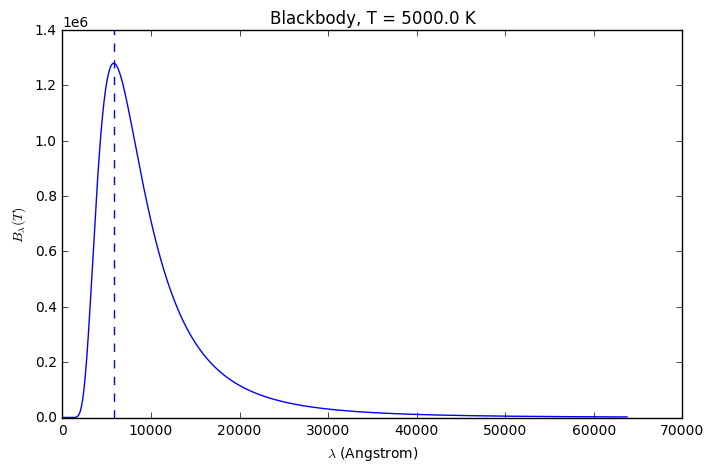

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(waveset.value, flux_lambda.value)
ax.axvline(wavemax.value, ls='--')
ax.get_yaxis().get_major_formatter().set_powerlimits((0, 1))
ax.set_xlabel(r'$\lambda$ ({0})'.format(waveset.unit))
ax.set_ylabel(r'$B_{\lambda}(T)$')
ax.set_title('Blackbody, T = {0}'.format(temperature))

Plot the distribution in terms of frequency.

In [ ]:
freqm = ?
freqset = np.logspace(0, np.log10(freqmax.value + 10 * freqmax.value), num=1000) * u.Hz
freqset

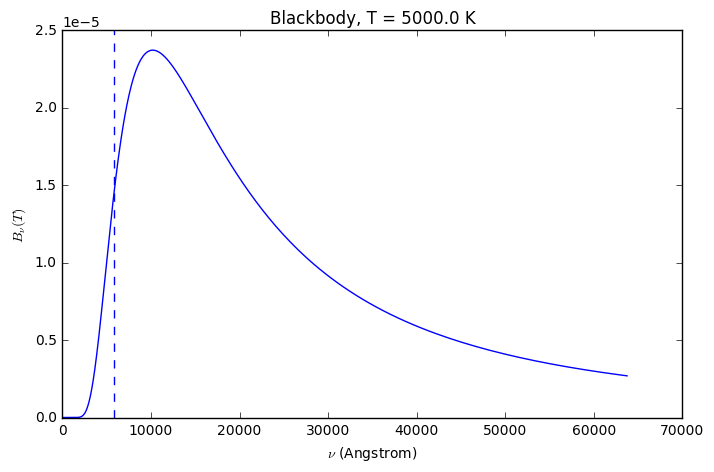

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(freqset.value, flux_nu.value)
ax.axvline(freqmax.value, ls='--')
ax.get_yaxis().get_major_formatter().set_powerlimits((0, 1))
ax.set_xlabel(r'$\nu$ ({0})'.format(freqset.unit))
ax.set_ylabel(r'$B_{\nu}(T)$')
ax.set_title('Blackbody, T = {0}'.format(temperature))
plt.show()